In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv

import contractions
import nltk
from nltk.text import Text
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# import spacy

import re 

In [2]:
df = pd.read_csv('washington_start.csv')

In [3]:
df

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/ginaaarrrrr/status/1241514...,2020-03-21 23:59:31+00:00,heard folk real,heard folk real,1241514809289510915,https://twitter.com/ginaaarrrrr,1,0,1,0,...,NaN,NaN,NaN,"Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/Micah_Escobedo/status/1241...,2020-03-21 23:50:50+00:00,apparently medium orgs amp even head need refr...,apparently medium orgs amp even head need refr...,1241512624359170049,https://twitter.com/Micah_Escobedo,0,0,2,0,...,NaN,NaN,"[User(username='WHO', id=14499829, displayname...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",['Covid_19'],NaN,NaN,NaN,NaN
2,https://twitter.com/freelancerjourn/status/124...,2020-03-21 23:48:46+00:00,soledadobrien would nice vp stepped podium sai...,soledadobrien would nice vp stepped podium sai...,1241512105800544256,https://twitter.com/freelancerjourn,0,0,2,0,...,1.241449e+18,https://twitter.com/soledadobrien,"[User(username='soledadobrien', id=26548315, d...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/WhiteSandsMT/status/124150...,2020-03-21 23:38:50+00:00,yes studio open regular business hour keep imm...,yes studio open regular business hour keep imm...,1241509603839324160,https://twitter.com/WhiteSandsMT,0,0,1,1,...,NaN,NaN,NaN,"Coordinates(longitude=-76.94844, latitude=38.9...","Place(id='f3f3e88ab848b86b', fullName='Hyattsv...",NaN,NaN,NaN,NaN,NaN
4,https://twitter.com/Richandwine/status/1241509...,2020-03-21 23:38:08+00:00,met wfualumni standing outside florianadc wait...,met wfualumni standing outside florianadc wait...,1241509428664373250,https://twitter.com/Richandwine,0,0,15,0,...,NaN,NaN,"[User(username='WFUAlumni', id=1901670500, dis...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",['supportlocalrestaurants'],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10962,https://twitter.com/GavinMacSkin/status/121943...,2020-01-21 01:25:44+00:00,chinese medical worker confirmed infected coro...,chinese medical worker confirmed infected coro...,1219430846853238786,https://twitter.com/GavinMacSkin,0,2,4,1,...,NaN,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...","['coronavirus', 'Wuhan']",NaN,SummaryCard(title='15 Chinese medical workers ...,NaN,NaN
10963,https://twitter.com/KyleOlbert/status/12191233...,2020-01-20 05:03:58+00:00,wuhanvirus coronavirus people often remark dee...,wuhanvirus coronavirus people often remark dee...,1219123379485188096,https://twitter.com/KyleOlbert,1,4,5,0,...,NaN,NaN,"[User(username='GlobalVirome', id=784470155300...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...","['WuhanVirus', 'coronavirus']",NaN,NaN,NaN,NaN
10964,https://twitter.com/sgeimann/status/1218317226...,2020-01-17 23:40:36+00:00,hey cbseveningnews woman speaking asian corona...,hey cbseveningnews woman speaking asian corona...,1218317226664714244,https://twitter.com/sgeimann,0,0,0,0,...,NaN,NaN,"[User(username='CBSEveningNews', id=42958829, ...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
10965,https://twitter.com/EnergyHouseVA/status/12182...,2020-01-17 20:03:13+00:00,three airport screen passenger chinese coronav...,three airport screen passenger chinese coronav...,1218262519380434946,https://twitter.com/EnergyHouseVA,0,0,1,0,...,NaN,NaN,NaN,"Coordinates(longitude=-77.144435, latitude=38....","Place(id='d6819fe606

In [4]:
df.isna().sum()

url                     0
date                    0
rawContent              3
renderedContent         3
id                      0
user                    0
replyCount              0
retweetCount            0
likeCount               0
quoteCount              0
conversationId          0
lang                    0
source                  0
sourceUrl               0
sourceLabel             0
links                7951
media                8887
retweetedTweet      10967
quotedTweet          9113
inReplyToTweetId     9544
inReplyToUser        9544
mentionedUsers       7333
coordinates             0
place                   0
hashtags             5354
cashtags            10964
card                10009
viewCount           10967
vibe                10967
dtype: int64

In [3]:
df['rawContent'].fillna('', inplace=True)
df['renderedContent'].fillna('', inplace=True)

In [4]:
## remove specific word HTTP
df['rawContent'] = df['rawContent'].str.replace('covid', '')
df['rawContent'] = df['rawContent'].str.replace('coronavirus', '')

df['renderedContent'] = df['renderedContent'].str.replace('covid', '')
df['renderedContent'] = df['renderedContent'].str.replace('coronavirus', '')

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

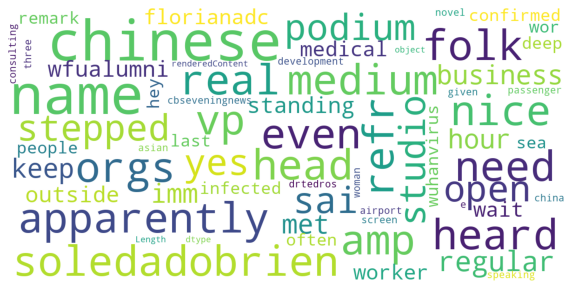

In [8]:
show_wordcloud(df["renderedContent"])

In [5]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [6]:
data = df['renderedContent'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['heard', 'folk', 'real']


## Building Bi-gram and Tri-gram Models

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [8]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
data_words_bigrams = make_bigrams(data_words)
data_words_bigrams

[['heard', 'folk', 'real'],
 ['apparently',
  'medium',
  'orgs',
  'amp',
  'even',
  'head',
  'need',
  'refresher',
  'via',
  'pewresearch',
  'millennials',
  'gen',
  'stupid',
  'kid',
  'going',
  'party',
  'gen',
  'millennial',
  'amp',
  'literally',
  'millennial',
  'take',
  'seriously'],
 ['soledadobrien',
  'would',
  'nice',
  'vp',
  'stepped',
  'podium',
  'said',
  'give',
  'remark',
  'want',
  'publicly',
  'express',
  'condolence',
  'nbcnews',
  'family',
  'loss',
  'colleague',
  'honor',
  'lost',
  'life',
  'get',
  'right'],
 ['yes',
  'studio',
  'open',
  'regular',
  'business',
  'hour',
  'keep',
  'immune_system',
  'strong',
  'releasing',
  'stress',
  'much',
  'needed',
  'massage',
  'know',
  'someone',
  'else',
  'stressed',
  'help',
  'giving'],
 ['met',
  'wfualumni',
  'standing',
  'outside',
  'florianadc',
  'waiting',
  'bring',
  'order',
  'saw',
  'wf',
  'jacket',
  'amp',
  'smiled',
  'amp',
  'said',
  'go',
  'deacs',
  '

In [9]:
data_words_trigrams = make_trigrams(data_words)
data_words_trigrams

[['heard', 'folk', 'real'],
 ['apparently',
  'medium',
  'orgs',
  'amp',
  'even',
  'head',
  'need',
  'refresher',
  'via',
  'pewresearch',
  'millennials',
  'gen',
  'stupid',
  'kid',
  'going',
  'party',
  'gen',
  'millennial',
  'amp',
  'literally',
  'millennial',
  'take',
  'seriously'],
 ['soledadobrien',
  'would',
  'nice',
  'vp',
  'stepped',
  'podium',
  'said',
  'give',
  'remark',
  'want',
  'publicly',
  'express',
  'condolence',
  'nbcnews',
  'family',
  'loss',
  'colleague',
  'honor',
  'lost',
  'life',
  'get',
  'right'],
 ['yes',
  'studio',
  'open',
  'regular',
  'business',
  'hour',
  'keep',
  'immune_system',
  'strong',
  'releasing',
  'stress',
  'much',
  'needed',
  'massage',
  'know',
  'someone',
  'else',
  'stressed',
  'help',
  'giving'],
 ['met',
  'wfualumni',
  'standing',
  'outside',
  'florianadc',
  'waiting',
  'bring',
  'order',
  'saw',
  'wf',
  'jacket',
  'amp',
  'smiled',
  'amp',
  'said',
  'go',
  'deacs',
  '

## Building rough LDA model 

In [10]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [16]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [17]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"school" + 0.008*"due" + 0.007*"student" + 0.006*"get" + 0.005*"free" '
  '+ 0.005*"amp" + 0.005*"please" + 0.005*"closed" + 0.004*"know" + '
  '0.004*"need"'),
 (1,
  '0.010*"people" + 0.008*"like" + 0.006*"outbreak" + 0.006*"trump" + '
  '0.005*"one" + 0.005*"china" + 0.005*"pandemic" + 0.005*"time" + '
  '0.005*"going" + 0.004*"dead"'),
 (2,
  '0.013*"people" + 0.010*"get" + 0.010*"trump" + 0.008*"like" + 0.008*"amp" + '
  '0.006*"say" + 0.006*"one" + 0.006*"going" + 0.006*"test" + 0.005*"said"'),
 (3,
  '0.008*"amp" + 0.008*"trump" + 0.008*"say" + 0.006*"china" + '
  '0.006*"response" + 0.005*"president" + 0.005*"take" + 0.004*"health" + '
  '0.004*"people" + 0.004*"via"'),
 (4,
  '0.023*"case" + 0.011*"outbreak" + 0.010*"health" + 0.009*"china" + '
  '0.008*"confirmed" + 0.008*"first" + 0.007*"virus" + 0.007*"new" + '
  '0.007*"state" + 0.006*"spread"')]


In [18]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.24635985975469765


## Tuning based on number of topics

In [19]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
       
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    # Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [20]:
# Can take a long time to run. 
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

coherence_scores = []
model_topics = []

for k in range(2, 20):
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word,k=k) 
    model_topics.append(k)    
    coherence_scores.append(cv)    
    print("#Topics: " + str(k) + ", Score: " + str(coherence_scores[-1]))

print(datetime.datetime.now())

2023-03-12 02:25:48.912541
#Topics: 2, Score: 0.1332088622871763
#Topics: 3, Score: 0.17263703050800058
#Topics: 4, Score: 0.2211880290130045
#Topics: 5, Score: 0.22929873999774567
#Topics: 6, Score: 0.29842534324511755
#Topics: 7, Score: 0.2322410248688888
#Topics: 8, Score: 0.2711103746002517
#Topics: 9, Score: 0.29380061542401603
#Topics: 10, Score: 0.32161751318424525
#Topics: 11, Score: 0.34827123511383634
#Topics: 12, Score: 0.3390200733607332
#Topics: 13, Score: 0.3505372499586041
#Topics: 14, Score: 0.34371888418010854
#Topics: 15, Score: 0.3664081454623006
#Topics: 16, Score: 0.34123463014113664
#Topics: 17, Score: 0.35214210035251825
#Topics: 18, Score: 0.35317740558035987
#Topics: 19, Score: 0.36208410659500584
2023-03-12 02:29:43.298659


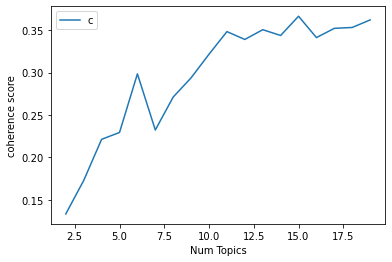

In [21]:
# Show graph

import matplotlib.pyplot as plt

limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence score"), loc='best')
plt.show()

In [25]:
end here

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-25-9bcc9ab561c7>, line 1)

### Final Model

In [11]:
num_topics = 15

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)

In [12]:
# Save the LDA model

from gensim.test.utils import datapath

lda_model_saved_file = datapath("us_start_lda_model_15")
lda_model.save(lda_model_saved_file)

In [27]:
score = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
score.get_coherence()

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.3546580407356492

In [28]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./lda_model/washington_start_lda_vis_tuned_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './lda_vis/washington_start_lda_vis_tuned_'+ str(num_topics) +'.html')

LDAvis_prepared

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.217090 -0.047696       1        1  11.071485
2      0.145676  0.017383       2        1  10.352240
10    -0.096559  0.145697       3        1   8.920815
14     0.139002  0.005259       4        1   7.991260
7      0.046395  0.107483       5        1   7.889753
0      0.071476 -0.021469       6        1   7.053553
1     -0.026792  0.073657       7        1   6.950394
9     -0.003795  0.015909       8        1   6.343881
8      0.080548  0.028272       9        1   5.941398
3     -0.106663  0.117383      10        1   5.669279
12     0.019469  0.030703      11        1   5.652289
13    -0.243295  0.055411      12        1   5.093606
5     -0.047712 -0.189162      13        1   4.276070
4     -0.082602 -0.141290      14        1   3.656104
11    -0.112238 -0.197540      15        1   3.137875, topic_info=           Term        Freq       Total Category  logprob  loglift
100        case  873.000000  873.000000  Default  30.0000  30.0000
516       china  585.000000  585.000000  Default  29.0000  29.0000
290       trump  968.000000  968.000000  Default  28.0000  28.0000
2601  confirmed  284.000000  284.000000  Default  27.0000  27.0000
1985        got  258.000000  258.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1712    allowed   19.974980   29.015062  Topic15  -5.3294   3.0883
68           go   42.354068  330.410565  Topic15  -4.5778   1.4074
102         day   40.898308  422.390641  Topic15  -4.6128   1.1268
1429       show   25.312363  141.602123  Topic15  -5.0926   1.7399
115          dc   21.338920  428.511276  Topic15  -5.2634   0.4618

[909 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2531     10  0.979629      abc
1152     11  0.907194  ability
381       2  0.265649     able
381       6  0.597710     able
381      10  0.039847     able
...     ...       ...      ...
64        6  0.053211      yes
64        8  0.133027      yes
64       11  0.066513      yes
1466     14  0.929895  youtube
5151     10  0.956160     zero

[1997 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 11, 15, 8, 1, 2, 10, 9, 4, 13, 14, 6, 5, 12])

**Added Sentiment Analysis**

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [14]:
def determine_sentiment(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"

In [15]:
sentiment_scores = df['rawContent'].apply(sid.polarity_scores)
sentiment_scores

0        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1        {'neg': 0.183, 'neu': 0.719, 'pos': 0.097, 'co...
2        {'neg': 0.159, 'neu': 0.588, 'pos': 0.253, 'co...
3        {'neg': 0.16, 'neu': 0.431, 'pos': 0.409, 'com...
4        {'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...
                               ...                        
10962    {'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...
10963    {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...
10964    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10965    {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...
10966    {'neg': 0.145, 'neu': 0.726, 'pos': 0.128, 'co...
Name: rawContent, Length: 10967, dtype: object

In [16]:
# Load the saved model

from gensim.test.utils import datapath
lda_model_saved_file = datapath("us_start_lda_model_15")
lda_model = gensim.models.ldamodel.LdaModel.load(lda_model_saved_file)

In [17]:
topics, num_topics = [], 15

for i in range(len(corpus)):
    top_topics = (
        lda_model.get_document_topics(corpus[i],
                                      minimum_probability=0.0))
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    topics.append(topic_vec.index(max(topic_vec))+1)
    
topics

[14,
 3,
 7,
 12,
 3,
 6,
 10,
 15,
 15,
 13,
 5,
 12,
 3,
 12,
 2,
 6,
 14,
 2,
 2,
 7,
 2,
 9,
 15,
 14,
 11,
 13,
 12,
 10,
 10,
 11,
 13,
 1,
 15,
 10,
 3,
 7,
 15,
 9,
 7,
 1,
 14,
 1,
 3,
 8,
 7,
 14,
 1,
 4,
 9,
 14,
 13,
 2,
 5,
 10,
 13,
 15,
 7,
 3,
 2,
 14,
 14,
 3,
 1,
 1,
 14,
 4,
 3,
 3,
 12,
 14,
 11,
 3,
 11,
 1,
 3,
 7,
 7,
 9,
 11,
 13,
 5,
 11,
 11,
 7,
 3,
 10,
 6,
 11,
 4,
 11,
 10,
 5,
 6,
 13,
 8,
 9,
 12,
 7,
 10,
 9,
 9,
 12,
 5,
 5,
 8,
 8,
 1,
 10,
 5,
 13,
 13,
 5,
 13,
 7,
 5,
 5,
 4,
 2,
 1,
 7,
 5,
 14,
 1,
 5,
 10,
 14,
 7,
 14,
 15,
 11,
 11,
 15,
 11,
 9,
 8,
 1,
 5,
 4,
 3,
 11,
 14,
 12,
 3,
 8,
 7,
 9,
 11,
 5,
 7,
 15,
 13,
 9,
 5,
 15,
 15,
 15,
 3,
 15,
 3,
 14,
 3,
 14,
 14,
 6,
 14,
 9,
 15,
 13,
 8,
 4,
 14,
 8,
 14,
 10,
 7,
 2,
 11,
 12,
 4,
 13,
 7,
 8,
 13,
 3,
 14,
 9,
 9,
 14,
 14,
 2,
 4,
 15,
 4,
 11,
 8,
 4,
 12,
 9,
 12,
 12,
 11,
 1,
 6,
 14,
 9,
 1,
 6,
 11,
 5,
 3,
 13,
 12,
 3,
 3,
 8,
 14,
 11,
 13,
 13,
 4,
 3,
 6,
 9,
 14,
 10

In [18]:
df["Topic"] = topics
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic
0,https://twitter.com/ginaaarrrrr/status/1241514...,2020-03-21 23:59:31+00:00,heard folk real,heard folk real,1241514809289510915,https://twitter.com/ginaaarrrrr,1,0,1,0,...,NaN,NaN,"Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,NaN,NaN,NaN,14
1,https://twitter.com/Micah_Escobedo/status/1241...,2020-03-21 23:50:50+00:00,apparently medium orgs amp even head need refr...,apparently medium orgs amp even head need refr...,1241512624359170049,https://twitter.com/Micah_Escobedo,0,0,2,0,...,NaN,"[User(username='WHO', id=14499829, displayname...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",['Covid_19'],NaN,NaN,NaN,NaN,3
2,https://twitter.com/freelancerjourn/status/124...,2020-03-21 23:48:46+00:00,soledadobrien would nice vp stepped podium sai...,soledadobrien would nice vp stepped podium sai...,1241512105800544256,https://twitter.com/freelancerjourn,0,0,2,0,...,https://twitter.com/soledadobrien,"[User(username='soledadobrien', id=26548315, d...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN,7
3,https://twitter.com/WhiteSandsMT/status/124150...,2020-03-21 23:38:50+00:00,yes studio open regular business hour keep imm...,yes studio open regular business hour keep imm...,1241509603839324160,https://twitter.com/WhiteSandsMT,0,0,1,1,...,NaN,NaN,"Coordinates(longitude=-76.94844, latitude=38.9...","Place(id='f3f3e88ab848b86b', fullName='Hyattsv...",NaN,NaN,NaN,NaN,NaN,12
4,https://twitter.com/Richandwine/status/1241509...,2020-03-21 23:38:08+00:00,met wfualumni standing outside florianadc wait...,met wfualumni standing outside florianadc wait...,1241509428664373250,https://twitter.com/Richandwine,0,0,15,0,...,NaN,"[User(username='WFUAlumni', id=1901670500, dis...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",['supportlocalrestaurants'],NaN,NaN,NaN,NaN,3


In [19]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
df["Sentiment"] = sentiment_label
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Topic,Sentiment
0,https://twitter.com/ginaaarrrrr/status/1241514...,2020-03-21 23:59:31+00:00,heard folk real,heard folk real,1241514809289510915,https://twitter.com/ginaaarrrrr,1,0,1,0,...,NaN,"Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,NaN,NaN,NaN,14,Neutral
1,https://twitter.com/Micah_Escobedo/status/1241...,2020-03-21 23:50:50+00:00,apparently medium orgs amp even head need refr...,apparently medium orgs amp even head need refr...,1241512624359170049,https://twitter.com/Micah_Escobedo,0,0,2,0,...,"[User(username='WHO', id=14499829, displayname...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",['Covid_19'],NaN,NaN,NaN,NaN,3,Negative
2,https://twitter.com/freelancerjourn/status/124...,2020-03-21 23:48:46+00:00,soledadobrien would nice vp stepped podium sai...,soledadobrien would nice vp stepped podium sai...,1241512105800544256,https://twitter.com/freelancerjourn,0,0,2,0,...,"[User(username='soledadobrien', id=26548315, d...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN,7,Positive
3,https://twitter.com/WhiteSandsMT/status/124150...,2020-03-21 23:38:50+00:00,yes studio open regular business hour keep imm...,yes studio open regular business hour keep imm...,1241509603839324160,https://twitter.com/WhiteSandsMT,0,0,1,1,...,NaN,"Coordinates(longitude=-76.94844, latitude=38.9...","Place(id='f3f3e88ab848b86b', fullName='Hyattsv...",NaN,NaN,NaN,NaN,NaN,12,Positive
4,https://twitter.com/Richandwine/status/1241509...,2020-03-21 23:38:08+00:00,met wfualumni standing outside florianadc wait...,met wfualumni standing outside florianadc wait...,1241509428664373250,https://twitter.com/Richandwine,0,0,15,0,...,"[User(username='WFUAlumni', id=1901670500, dis...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",['supportlocalrestaurants'],NaN,NaN,NaN,NaN,3,Positive


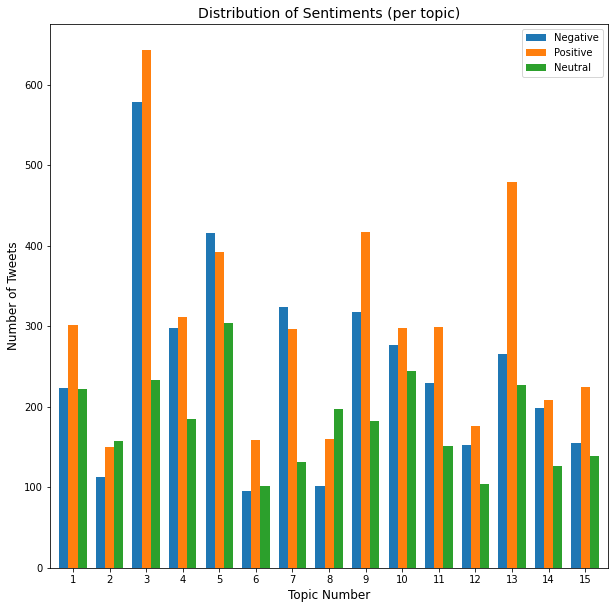

In [20]:
import matplotlib.pyplot as plt

topics = range(1, num_topics+1)
columns = ["Negative", "Positive", "Neutral"]
data = []

for i in range(num_topics):
    curr_topic = df[df["Topic"] == i+1]
    negative, positive, neutral = len(curr_topic[curr_topic["Sentiment"] == "Negative"]), len(curr_topic[curr_topic["Sentiment"] == "Positive"]), len(curr_topic[curr_topic["Sentiment"] == "Neutral"]) 
    data.append([negative, positive, neutral])

topic_sentiment_df = pd.DataFrame(data, columns=columns, index=topics)
topic_sentiment_df.plot(kind="bar", figsize=(10, 10), width=0.75)
plt.title("Distribution of Sentiments (per topic)", fontsize=14)
plt.xlabel("Topic Number", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.gca().xaxis.set_tick_params(rotation=0)
plt.show()